<a href="https://colab.research.google.com/github/MarcelahCaetanoh/Projeto-4--Jornada-DS/blob/main/Projeto_4_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Projeto 4- **Aprendizado Não Supervisionado(PCA)**

In [2]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
pd.set_option('display.max_rows' , None)
pd.set_option('display.max_columns' , None)

pd.set_option('display.float_format', lambda x: '%.2f' % x)


In [4]:
import pandas as pd
from google.colab import drive

drive.mount ('/content/drive')

Mounted at /content/drive


In [5]:
df_microvan = pd.read_csv('/content/drive/My Drive/Colab Notebooks/microvan.csv')
df_microvan.head()

,subjnumb,mvliking,kidtrans,miniboxy,lthrbetr,secbiggr,safeimpt,buyhghnd,pricqual,prmsound,perfimpt,tkvacatn,noparkrm,homlrgst,envrminr,needbetw,suvcmpct,next2str,carefmny,shdcarpl,imprtapp,lk4whldr,kidsbulk,wntguzlr,nordtrps,stylclth,strngwrn,passnimp,twoincom,nohummer,aftrschl,accesfun,age,income,miles,numkids,female,educ,recycle
0,1,4,6,5,2,5,3,4,3,4,7,3,6,4,6,5,6,9,6,3,2,3,5,7,6,5,3,6,2,6,4,4,34,59,14,1,0,1,3
1,2,6,3,5,3,7,5,5,4,6,4,5,7,4,4,7,6,3,5,6,6,6,2,4,6,6,4,6,7,6,3,5,36,79,16,1,0,3,4
2,3,3,7,1,5,2,5,4,5,5,5,6,3,8,5,6,4,7,4,6,5,6,7,3,4,5,7,4,4,2,7,6,51,72,22,2,1,3,3
3,4,3,3,5,3,6,6,6,6,4,5,4,6,5,7,6,4,3,6,4,3,6,2,7,7,1,6,8,6,4,2,3,32,42,12,0,0,3,2
4,5,1,4,3,6,3,4,6,6,6,5,5,3,7,5,3,3,6,9,7,6,5,5,4,6,1,5,6,4,4,5,5,40,75,17,1,1,3,4


In [6]:
df_microvan.columns

Index(['subjnumb', 'mvliking', 'kidtrans', 'miniboxy', 'lthrbetr', 'secbiggr',
       'safeimpt', 'buyhghnd', 'pricqual', 'prmsound', 'perfimpt', 'tkvacatn',
       'noparkrm', 'homlrgst', 'envrminr', 'needbetw', 'suvcmpct', 'next2str',
       'carefmny', 'shdcarpl', 'imprtapp', 'lk4whldr', 'kidsbulk', 'wntguzlr',
       'nordtrps', 'stylclth', 'strngwrn', 'passnimp', 'twoincom', 'nohummer',
       'aftrschl', 'accesfun', 'age', 'income', 'miles', 'numkids', 'female',
       'educ', 'recycle'],
      dtype='object')

In [7]:
df_microvan = df_microvan.set_index('subjnumb')
df_microvan.head()

,mvliking,kidtrans,miniboxy,lthrbetr,secbiggr,safeimpt,buyhghnd,pricqual,prmsound,perfimpt,tkvacatn,noparkrm,homlrgst,envrminr,needbetw,suvcmpct,next2str,carefmny,shdcarpl,imprtapp,lk4whldr,kidsbulk,wntguzlr,nordtrps,stylclth,strngwrn,passnimp,twoincom,nohummer,aftrschl,accesfun,age,income,miles,numkids,female,educ,recycle
subjnumb,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4,6,5,2,5,3,4,3,4,7,3,6,4,6,5,6,9,6,3,2,3,5,7,6,5,3,6,2,6,4,4,34,59,14,1,0,1,3
2,6,3,5,3,7,5,5,4,6,4,5,7,4,4,7,6,3,5,6,6,6,2,4,6,6,4,6,7,6,3,5,36,79,16,1,0,3,4
3,3,7,1,5,2,5,4,5,5,5,6,3,8,5,6,4,7,4,6,5,6,7,3,4,5,7,4,4,2,7,6,51,72,22,2,1,3,3
4,3,3,5,3,6,6,6,6,4,5,4,6,5,7,6,4,3,6,4,3,6,2,7,7,1,6,8,6,4,2,3,32,42,12,0,0,3,2
5,1,4,3,6,3,4,6,6,6,5,5,3,7,5,3,3,6,9,7,6,5,5,4,6,1,5,6,4,4,5,5,40,75,17,1,1,3,4


In [8]:
dicionario_dados = dict()

dicionario_dados['kidtrans'] = 'Precisamos de um carro que ajude a transportar nossos filhos os seus amigos'
dicionario_dados['miniboxy'] = 'As minivans atuais são simplesmente muito quadradas e grandes'
dicionario_dados['lthrbetr'] = 'Os assentos de couro são muito melhores que os de tecido'
dicionario_dados['secbiggr'] = 'Se tivéssemos um segundo carro, precisaria ser maior que um sedã padrão'
dicionario_dados['safeimpt'] = 'A segurança do automóvel é muito importante para mim'
dicionario_dados['buyhghnd'] = 'Nós tendemos a comprar carros mais sofisticados'
dicionario_dados['pricqual'] = 'Os preços dos automóveis refletem fortemente a qualidade de produção subjacente'
dicionario_dados['prmsound'] = 'Um sistema de som e entretenimento premium ajuda em longas viagens de carro'
dicionario_dados['perfimpt'] = 'O desempenho é muito importante em um carro'
dicionario_dados['tkvacatn'] = 'Tentamos tirar o máximo de férias possível'
dicionario_dados['noparkrm'] = 'Nossa residência atual não tem muito espaço de estacionamento'
dicionario_dados['homlrgst'] = 'Nossa casa está entre as maiores do bairro'
dicionario_dados['envrminr'] = 'O impacto ambiental dos automóveis é relativamente pequeno'
dicionario_dados['needbetw'] = 'Precisa haver algo entre um sedan e uma minivan'
dicionario_dados['suvcmpct'] = 'Gosto mais de SUVs do que de minivans, pois são mais compactos'
dicionario_dados['next2str'] = 'Meu próximo carro será um de dois lugares'
dicionario_dados['carefmny'] = 'Temos cuidado com o dinheiro'
dicionario_dados['shdcarpl'] = 'Acho que todo mundo deveria pegar carona ou usar transporte público'
dicionario_dados['imprtapp'] = 'A maioria dos nossos aparelhos são importados'
dicionario_dados['lk4whldr'] = 'A tração nas quatro rodas é uma opção muito atraente'
dicionario_dados['kidsbulk'] = 'Nossos filhos tendem a levar muitos itens volumosos e brinquedos com eles'
dicionario_dados['wntguzlr'] = 'Eu vou comprar o que eu quero mesmo que seja um “bebedor de gás”'
dicionario_dados['nordtrps'] = 'Não fazemos viagens com a família'
dicionario_dados['stylclth'] = 'Nós tendemos a comprar roupas elegantes para a família'
dicionario_dados['strngwrn'] = 'A proteção da garantia precisa ser forte em um carro novo'
dicionario_dados['passnimp'] = 'A paixão pelo trabalho é mais importante do que o pagamento'
dicionario_dados['twoincom'] = 'Nossa família acharia difícil subsistir com apenas uma renda'
dicionario_dados['nohummer'] = 'Não estou interessado em possuir um veículo como um Hummer'
dicionario_dados['aftrschl'] = 'Nós nos envolvemos em mais atividades depois da escola do que a maioria das famílias'
dicionario_dados['accesfun'] = 'Os acessórios realmente tornam o carro mais divertido de dirigir'
dicionario_dados['age'] = 'Idade do entrevistado em anos'
dicionario_dados['income'] = 'Renda familiar anual em milhares de dólares'
dicionario_dados['miles'] = 'Valor anual total conduzido por membros da família em milhares de milhas'
dicionario_dados['numkids'] = 'Número de crianças (0-18 anos) que residem no domicílio'
dicionario_dados['female'] = 'Se o entrevistado é ou não uma mulher'
dicionario_dados['educ'] = 'Nível de escolaridade do entrevistado (1 = Ensino médio, 2 = Alguma faculdade, 3 = Graduação, 4 = Pós-graduação)'
dicionario_dados['recycle'] = 'Reciclagem autorrelatada em comparação com a média (1 = Muito menos, 2 = Um pouco menos, 3 = Médio, 4 = Um pouco mais, 5 = Muito mais)'

In [9]:
dicionario_dados['age']

'Idade do entrevistado em anos'

In [10]:
df_microvan.shape

(400, 38)

In [11]:
df_microvan.dtypes

mvliking    int64
kidtrans    int64
miniboxy    int64
lthrbetr    int64
secbiggr    int64
safeimpt    int64
buyhghnd    int64
pricqual    int64
prmsound    int64
perfimpt    int64
tkvacatn    int64
noparkrm    int64
homlrgst    int64
envrminr    int64
needbetw    int64
suvcmpct    int64
next2str    int64
carefmny    int64
shdcarpl    int64
imprtapp    int64
lk4whldr    int64
kidsbulk    int64
wntguzlr    int64
nordtrps    int64
stylclth    int64
strngwrn    int64
passnimp    int64
twoincom    int64
nohummer    int64
aftrschl    int64
accesfun    int64
age         int64
income      int64
miles       int64
numkids     int64
female      int64
educ        int64
recycle     int64
dtype: object

In [12]:
df_microvan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 38 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   mvliking  400 non-null    int64
 1   kidtrans  400 non-null    int64
 2   miniboxy  400 non-null    int64
 3   lthrbetr  400 non-null    int64
 4   secbiggr  400 non-null    int64
 5   safeimpt  400 non-null    int64
 6   buyhghnd  400 non-null    int64
 7   pricqual  400 non-null    int64
 8   prmsound  400 non-null    int64
 9   perfimpt  400 non-null    int64
 10  tkvacatn  400 non-null    int64
 11  noparkrm  400 non-null    int64
 12  homlrgst  400 non-null    int64
 13  envrminr  400 non-null    int64
 14  needbetw  400 non-null    int64
 15  suvcmpct  400 non-null    int64
 16  next2str  400 non-null    int64
 17  carefmny  400 non-null    int64
 18  shdcarpl  400 non-null    int64
 19  imprtapp  400 non-null    int64
 20  lk4whldr  400 non-null    int64
 21  kidsbulk  400 non-null    int64
 22  wn

**Começando a estatística descritiva**

In [13]:
df_microvan.describe()


,mvliking,kidtrans,miniboxy,lthrbetr,secbiggr,safeimpt,buyhghnd,pricqual,prmsound,perfimpt,tkvacatn,noparkrm,homlrgst,envrminr,needbetw,suvcmpct,next2str,carefmny,shdcarpl,imprtapp,lk4whldr,kidsbulk,wntguzlr,nordtrps,stylclth,strngwrn,passnimp,twoincom,nohummer,aftrschl,accesfun,age,income,miles,numkids,female,educ,recycle
count,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00
mean,4.84,4.83,4.67,4.25,5.23,5.00,5.28,4.96,4.72,5.00,4.44,4.58,5.49,5.53,4.94,4.78,4.49,5.22,5.17,4.56,5.24,4.48,5.06,5.32,5.34,5.04,5.62,4.87,4.85,4.38,4.64,40.05,71.28,18.04,1.22,0.54,2.81,3.04
std,2.69,1.52,1.48,1.52,1.51,1.51,1.54,1.52,1.51,1.49,1.53,1.52,1.50,1.52,1.55,1.51,1.55,1.53,1.50,1.50,1.46,1.48,1.51,1.49,1.53,1.50,1.51,1.56,1.54,1.51,1.52,8.57,43.28,4.86,1.08,0.50,0.93,1.18
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,19.00,15.00,7.00,0.00,0.00,1.00,1.00
25%,3.00,4.00,4.00,3.00,4.00,4.00,4.00,4.00,4.00,4.00,3.00,3.00,5.00,5.00,4.00,4.00,3.00,4.00,4.00,3.00,4.00,3.75,4.00,4.00,4.00,4.00,5.00,4.00,4.00,3.00,3.00,34.00,36.00,15.00,0.00,0.00,2.00,2.00
50%,5.00,5.00,5.00,4.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,4.00,5.00,6.00,5.00,5.00,4.00,5.00,5.00,5.00,5.00,4.00,5.00,5.00,5.00,5.00,6.00,5.00,5.00,4.00,5.00,40.00,62.50,18.00,1.00,1.00,3.00,3.00
75%,7.00,6.00,6.00,5.00,6.00,6.00,6.00,6.00,6.00,6.00,5.25,6.00,7.00,7.00,6.00,6.00,6.00,7.00,6.00,6.00,6.00,5.00,6.00,6.00,6.00,6.00,7.00,6.00,6.00,5.00,6.00,46.00,96.00,21.00,2.00,1.00,3.00,4.00
max,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,60.00,273.00,32.00,4.00,1.00,4.00,5.00


**Redução de Dimensionalidade**

In [14]:
from sklearn.decomposition import PCA
import matplotlib.cm as cm

In [15]:
colunas_demograficas = ['age', 'income', 'miles', 'numkids', 'female', 'educ', 'recycle', 'mvliking']

pca = PCA(n_components=2, random_state=42).fit(df_microvan.drop(colunas_demograficas, axis=1))

In [16]:
pca.explained_variance_ratio_

array([0.2769671 , 0.16760968])

In [17]:
for numero_componentes in range(1,10):

    pca = PCA(n_components=numero_componentes, random_state=42).fit(df_microvan.drop(colunas_demograficas, axis=1))
    print(f'{numero_componentes} componentes com variância explicada total de {sum(pca.explained_variance_ratio_)}:{pca.explained_variance_ratio_}')

1 componentes com variância explicada total de 0.27696709879672465:[0.2769671]
2 componentes com variância explicada total de 0.4445767750017477:[0.2769671  0.16760968]
3 componentes com variância explicada total de 0.5459459552274872:[0.2769671  0.16760968 0.10136918]
4 componentes com variância explicada total de 0.6342464490894244:[0.2769671  0.16760968 0.10136918 0.08830049]
5 componentes com variância explicada total de 0.6949209280291696:[0.2769671  0.16760968 0.10136918 0.08830049 0.06067448]
6 componentes com variância explicada total de 0.7163695796236542:[0.2769671  0.16760968 0.10136918 0.08830049 0.06067448 0.02144865]
7 componentes com variância explicada total de 0.7356422840632018:[0.2769671  0.16760968 0.10136918 0.08830049 0.06067448 0.02144865
 0.0192727 ]
8 componentes com variância explicada total de 0.753873788437881:[0.2769671  0.16760968 0.10136918 0.08830049 0.06067448 0.02144865
 0.0192727  0.0182315 ]
9 componentes com variância explicada total de 0.7715039823

In [18]:
pca = PCA(n_components=5, random_state=42).fit(df_microvan.drop(colunas_demograficas, axis=1))

In [19]:
df_microvan.shape

(400, 38)

In [20]:
pca.components_

array([[-1.54242523e-01, -2.81775831e-02, -2.77771856e-01,
         1.31120032e-02, -6.55592685e-02, -2.48789125e-01,
        -1.87212012e-01, -2.57534039e-01,  2.75945850e-02,
        -2.88168029e-01, -3.63932100e-02, -1.62540808e-01,
         1.67796640e-01, -4.41662433e-02, -5.51359745e-02,
        -6.95906332e-02,  2.91928208e-01, -1.70653306e-01,
        -2.48765321e-01, -1.12947539e-01, -1.64018658e-01,
         2.12266322e-01,  1.33568970e-01, -2.56185238e-01,
        -1.38779086e-01,  2.71164567e-01, -1.99131255e-01,
        -1.99116260e-02, -1.48933645e-01, -2.85564500e-01],
       [ 1.09807865e-03, -3.64988114e-01,  8.12541567e-02,
        -3.38909225e-01, -2.18792400e-04, -8.27943891e-02,
         7.97252373e-02,  6.19192696e-03,  1.47139293e-02,
         1.17792436e-02, -3.61515356e-01,  2.99948345e-01,
         1.51018703e-02, -3.46323846e-01, -3.61913246e-01,
         3.38353633e-01,  6.73537198e-02,  1.41603682e-02,
         7.29399128e-03,  7.47233603e-03, -5.49026164e-

In [24]:
df_composicao_componentes = pd.DataFrame(columns=df_microvan.drop(colunas_demograficas, axis=1).columns)

for i in range(5):
     df_composicao_componentes.loc[i] = pca.components_[i]

df_composicao_componentes


,kidtrans,miniboxy,lthrbetr,secbiggr,safeimpt,buyhghnd,pricqual,prmsound,perfimpt,tkvacatn,noparkrm,homlrgst,envrminr,needbetw,suvcmpct,next2str,carefmny,shdcarpl,imprtapp,lk4whldr,kidsbulk,wntguzlr,nordtrps,stylclth,strngwrn,passnimp,twoincom,nohummer,aftrschl,accesfun
0,-0.15,-0.03,-0.28,0.01,-0.07,-0.25,-0.19,-0.26,0.03,-0.29,-0.04,-0.16,0.17,-0.04,-0.06,-0.07,0.29,-0.17,-0.25,-0.11,-0.16,0.21,0.13,-0.26,-0.14,0.27,-0.20,-0.02,-0.15,-0.29
1,0.00,-0.36,0.08,-0.34,-0.00,-0.08,0.08,0.01,0.01,0.01,-0.36,0.30,0.02,-0.35,-0.36,0.34,0.07,0.01,0.01,0.01,-0.01,-0.01,0.04,-0.11,0.13,0.01,-0.06,-0.32,0.05,0.01
2,0.37,-0.05,-0.04,0.01,0.30,-0.07,-0.10,-0.06,-0.31,-0.08,0.02,-0.04,0.27,-0.00,0.08,0.02,0.06,-0.23,0.05,0.22,0.29,0.23,-0.34,-0.11,0.20,-0.01,-0.08,0.05,0.37,-0.05
3,0.31,-0.07,0.03,0.04,-0.44,-0.06,-0.02,-0.01,0.42,0.04,-0.00,-0.00,0.11,-0.05,0.05,0.07,0.01,-0.13,-0.02,-0.42,0.25,0.05,-0.26,0.03,-0.34,-0.11,-0.08,-0.02,0.18,0.07
4,-0.13,0.03,0.08,-0.07,-0.03,0.30,0.42,0.08,0.08,-0.05,0.11,-0.07,0.41,0.02,-0.04,0.17,-0.09,-0.42,-0.07,-0.03,-0.12,0.29,0.16,-0.04,0.03,-0.03,0.39,0.03,-0.02,0.01


In [25]:
df_composicao_componentes.loc[0].max()

0.2919282078756141

In [26]:
df_composicao_componentes.loc[0].argmax()

16

In [28]:
df_composicao_componentes.columns[df_composicao_componentes.loc[0].argmax()]

'carefmny'

In [29]:
dicionario_dados['carefmny']

'Temos cuidado com o dinheiro'

In [30]:
for i in range(5):
   coluna_maior = df_composicao_componentes.columns[df_composicao_componentes.loc[i].argmax()]
   coluna_menor = df_composicao_componentes.columns[df_composicao_componentes.loc[i].argmin()]

   print(f'Componente {i+1} impacto positivo: "{dicionario_dados[coluna_maior]}" e impacto negativo: "{dicionario_dados[coluna_menor]}"\n\n' )

Componente 1 impacto positivo: "Temos cuidado com o dinheiro" e impacto negativo: "Tentamos tirar o máximo de férias possível"


Componente 2 impacto positivo: "Meu próximo carro será um de dois lugares" e impacto negativo: "As minivans atuais são simplesmente muito quadradas e grandes"


Componente 3 impacto positivo: "Nós nos envolvemos em mais atividades depois da escola do que a maioria das famílias" e impacto negativo: "Não fazemos viagens com a família"


Componente 4 impacto positivo: "O desempenho é muito importante em um carro" e impacto negativo: "A segurança do automóvel é muito importante para mim"


Componente 5 impacto positivo: "Os preços dos automóveis refletem fortemente a qualidade de produção subjacente" e impacto negativo: "Acho que todo mundo deveria pegar carona ou usar transporte público"




**Analisando graficamente os pesos de cada variável nos componentes principais**

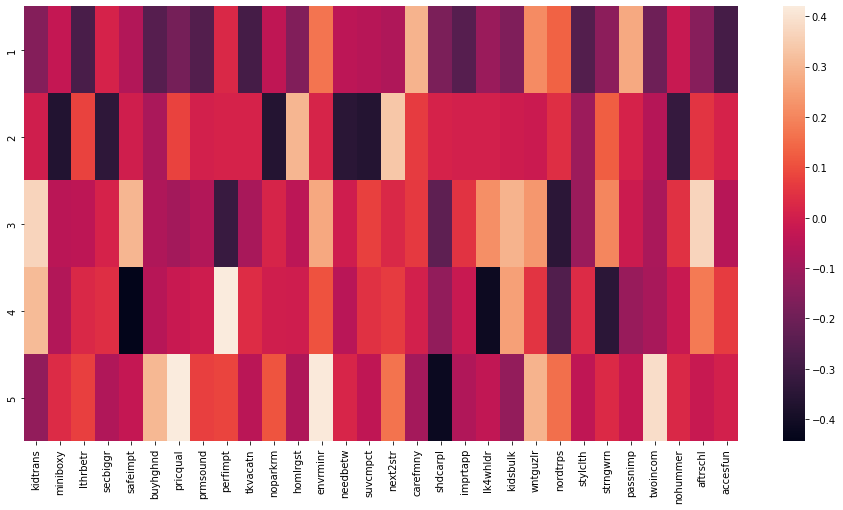

In [31]:
import seaborn as sns

plt.figure(figsize=(16,8))
sns.heatmap(data=df_composicao_componentes, yticklabels=df_composicao_componentes.index+1)

In [32]:
componentes_principais_microvan = pca.transform(df_microvan.drop(colunas_demograficas, axis=1))
componentes_principais_microvan

array([[ 4.95739724, -0.630778  ,  0.25397408,  4.53413096,  0.4787577 ],
       [-0.42529226, -4.57730748, -2.68257259, -2.62292284, -0.50422577],
       [-4.20223653,  5.99835902,  2.46455968,  1.54782301, -2.41202492],
       ...,
       [-6.4115679 , -4.47822563, -6.6555251 , -0.29161379, -1.62472682],
       [-3.57270499, -5.5292335 ,  0.25267482,  2.61167859, -1.04362801],
       [ 4.05034892,  2.45977589,  3.75878157, -0.49039215,  0.74268315]])